<a href="https://colab.research.google.com/github/lxLisbethEspinozaxl/TrabajoFinalUnidadIII-InteligenciaDeNegocios/blob/master/Biblioteca_Recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SISTEMA DE RECOMENDACION DE LIBROS DE BIBLIOTECA FILTRADO POR COLABORATIVO

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [0]:
books = pd.read_csv('books.csv')
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.900000e+01,99.000000,99.000000,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,50.000000,1.653979e+06,2.020180e+06,4.388198e+06,532.383838,9.780473e+12,1943.171717,4.055051,1.263703e+06,1.361989e+06,39012.222222,39065.565657,70538.828283,228209.626263,4.204259e+05,6.037495e+05
std,28.722813,4.030956e+06,4.681734e+06,6.465936e+06,700.853630,3.961477e+08,277.288365,0.245059,7.832598e+05,7.978995e+05,28693.522227,50901.940472,55694.613546,124117.176087,2.231151e+05,4.628464e+05
min,1.000000,1.000000e+00,1.000000e+00,5.397000e+03,14.000000,9.780007e+12,-720.000000,3.510000,3.872900e+05,5.493010e+05,4239.000000,4623.000000,15781.000000,76071.000000,1.403040e+05,1.760720e+05
25%,25.500000,3.925000e+03,4.297500e+03,1.681676e+06,172.500000,9.780150e+12,1952.500000,3.870000,7.388255e+05,8.051315e+05,17789.500000,15337.500000,35029.500000,138675.500000,2.635695e+05,3.130130e+05
50%,50.000000,1.813500e+04,1.906300e+04,3.036731e+06,226.000000,9.780385e+12,1997.000000,4.060000,1.053403e+06,1.125231e+06,31212.000000,27340.000000,58323.000000,200154.000000,3.475400e+05,4.628290e+05
75%,74.500000,1.927180e+05,3.135880e+05,3.357144e+06,480.500000,9.780553e+12,2005.000000,4.245000,1.653671e+06,1.729282e+06,48035.000000,45624.000000,86238.000000,277074.000000,5.184895e+05,7.283425e+05
max,99.000000,2.255727e+07,2.255727e+07,4.133543e+07,3455.000000,9.781612e+12,2015.000000,4.610000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [0]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [0]:
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [0]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [0]:
tags = pd.read_csv('tags.csv')
tags.tail()

,tag_id,tag_name
94,94,016-sam-j-miller
95,95,01_best-books
96,96,02-500-750
97,97,02-black-exp
98,98,02-fantasy


In [0]:
toread = pd.read_csv('to_read.csv')
toread.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [0]:
print(books.keys())

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


In [0]:
def null_table(training):
    print("Books Data Frame")
    print(pd.isnull(books).sum()) 
    print(" ")
    
null_table(books)

Books Data Frame
book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               1
title                        0
language_code                1
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64
 


In [0]:
books['original_title'].isnull().sum()

1

In [0]:
books['book_id'].isnull().sum()

0

In [0]:
ratings.apply(lambda x: x.isnull().sum(),axis=0)

user_id    0
book_id    0
rating     0
dtype: int64

In [0]:
books.apply(lambda x: x.isnull().sum(),axis=0)

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               1
title                        0
language_code                1
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

In [0]:
books.drop(columns=['language_code'])
books.dropna(axis=0, how='any', thresh=None, subset=None)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [0]:
#Ahora filtramos cosas requeridas.
books_filter = pd.DataFrame(books, columns=['book_id', 'authors', 'title', 'average_rating'])

In [0]:
books_filter = books_filter.sort_values('book_id')
books_filter.head()

,book_id,authors,title,average_rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.34
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",3.57
3,4,Harper Lee,To Kill a Mockingbird,4.25
4,5,F. Scott Fitzgerald,The Great Gatsby,3.89


In [0]:
print(books_filter['title'])

0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (

In [0]:
books_final = pd.merge(books_filter, ratings, on='book_id')
print(books_final)

    book_id                                  authors  ... user_id  rating
0         2              J.K. Rowling, Mary GrandPré  ...       4       5
1         5                      F. Scott Fitzgerald  ...       4       4
2         8                            J.D. Salinger  ...       4       4
3        13  George Orwell, Erich Fromm, Celâl Üster  ...       4       4
4        14                            George Orwell  ...       8       5
5        18  J.K. Rowling, Mary GrandPré, Rufus Beck  ...       4       5
6        21              J.K. Rowling, Mary GrandPré  ...       4       5
7        23              J.K. Rowling, Mary GrandPré  ...       4       5
8        24              J.K. Rowling, Mary GrandPré  ...       4       5
9        26                                Dan Brown  ...       2       4
10       26                                Dan Brown  ...       4       3
11       27              J.K. Rowling, Mary GrandPré  ...       4       5
12       28                          W

In [0]:
# Ahora obteniendo los datos finales, es decir, la calificación de cada libro para cada libro individual
rating_all = pd.pivot_table(books_final, index='user_id', values='rating', columns='title', fill_value=0)

In [0]:
print(rating_all)

title    1984  A Time to Kill  ...  The Great Gatsby  Where the Sidewalk Ends
user_id                        ...                                           
1           0               0  ...                 0                        0
2           0               0  ...                 0                        0
4           4               4  ...                 4                        4
8           0               0  ...                 0                        0

[4 rows x 27 columns]


In [0]:
#Encontramos ahora la puntuación de correlación. Pero, necesitamos encontrar la recomendación de los libros y no de los usuarios, por lo tanto, para encontrar la puntuación de correlación de los libros, usamos Transpose de la matriz final
correlation_score = np.corrcoef(rating_all.T)

In [0]:
print(correlation_score.shape)

(27, 27)


In [0]:
booklist = list(rating_all)
title = []
for i in range (len(booklist)):
    title.append(booklist[i])

In [0]:
print(title)

['1984', 'A Time to Kill', 'Animal Farm', 'Brave New World', "Ender's Game (Ender's Saga, #1)", 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'Harry Potter and the Goblet of Fire (Harry Potter, #4)', 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'Jurassic Park (Jurassic Park, #1)', 'Life of Pi', 'Little Women (Little Women, #1)', 'Lord of the Flies', 'Memoirs of a Geisha', 'Night (The Night Trilogy #1)', 'Of Mice and Men', 'Slaughterhouse-Five', 'The Adventures of Huckleberry Finn', 'The Alchemist', 'The Book Thief', 'The Catcher in the Rye', 'The Da Vinci Code (Robert Langdon, #2)', 'The Giver (The Giver, #1)', 'The Great Gatsby', 'Where the Sidewalk Ends']


In [0]:
test = 'The Great Gatsby'
test_index = title.index(test)

In [0]:
score = correlation_score[test_index]

In [0]:
print(sorted(score, reverse = True))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4436069753671345, 0.4042260417272216, 0.4042260417272216, -0.3333333333333333, -0.3333333333333333]


In [0]:
check = (score>=0.4)

In [0]:
rec = np.extract(check, title)

In [0]:
def generate_reccomendation(booklist):
    similar = np.zeros(correlation_score.shape[0])
    
    for book in booklist:
        index = title.index(book)
        similar += correlation_score[index]
    
    preferences = []
    for i in range (len(title)):
        preferences.append((title[i],similar[i]))
        
    return sorted(preferences, key = lambda x:x[1], reverse = True)

In [0]:
# Get books user has read
user_books = ['A Time to Kill', 'Life of Pi','The Book Thief']

In [0]:
final_recommendation = generate_reccomendation(user_books)

In [0]:
print("Result")
print()
i = 0
count = 0
while count<10:
    recommended = final_recommendation[i][0]
    i += 1
    if recommended in user_books:
        continue
    else:
        print(recommended)
        count += 1

Result

1984
Ender's Game (Ender's Saga, #1)
Jurassic Park (Jurassic Park, #1)
Lord of the Flies
Of Mice and Men
Slaughterhouse-Five
The Adventures of Huckleberry Finn
The Catcher in the Rye
The Great Gatsby
Where the Sidewalk Ends


In [0]:
#Filter for collaborative
books_filter = pd.DataFrame(books, columns=['book_id', 'authors', 'title', 'average_rating'])

In [0]:
books_filter = books_filter.sort_values('book_id')
books_filter.head()

,book_id,authors,title,average_rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.34
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",3.57
3,4,Harper Lee,To Kill a Mockingbird,4.25
4,5,F. Scott Fitzgerald,The Great Gatsby,3.89


In [0]:
print(books_filter['authors'])

0                                       Suzanne Collins
1                           J.K. Rowling, Mary GrandPré
2                                       Stephenie Meyer
3                                            Harper Lee
4                                   F. Scott Fitzgerald
5                                            John Green
6                                        J.R.R. Tolkien
7                                         J.D. Salinger
8                                             Dan Brown
9                                           Jane Austen
10                                      Khaled Hosseini
11                                        Veronica Roth
12              George Orwell, Erich Fromm, Celâl Üster
13                                        George Orwell
14    Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...
15                           Stieg Larsson, Reg Keeland
16                                      Suzanne Collins
17              J.K. Rowling, Mary GrandPré, Ruf

In [0]:
rating_all_author = pd.pivot_table(books_final, index='user_id', values='rating', columns='authors', fill_value=0)

In [0]:
correlation_score_author = np.corrcoef(rating_all.T)

In [0]:
authorlist = list(rating_all_author)
authorname = []
for i in range (len(authorlist)):
    authorname.append(authorlist[i])

In [0]:
print(authorname)

['Aldous Huxley', 'Arthur Golden', 'Dan Brown', 'Elie Wiesel, Marion Wiesel', 'F. Scott Fitzgerald', 'George Orwell', 'George Orwell, Erich Fromm, Celâl Üster', 'J.D. Salinger', 'J.K. Rowling, Mary GrandPré', 'J.K. Rowling, Mary GrandPré, Rufus Beck', 'John Grisham', 'John Steinbeck', 'Kurt Vonnegut Jr.', 'Lois Lowry', 'Louisa May Alcott', 'Mark Twain, John Seelye, Guy Cardwell', 'Markus Zusak', 'Michael Crichton', 'Orson Scott Card', 'Paulo Coelho, Alan R. Clarke', 'Shel Silverstein', 'William Golding', 'Yann Martel']


In [0]:
test_auth = 'Dan Brown'
test_index_auth = authorname.index(test_auth)

In [0]:
score_auth = correlation_score_author[test_index_auth]

In [0]:
print(sorted(score_auth, reverse = True))

[1.0, 0.6970966755769258, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.5659164584181102, -0.5659164584181102]


In [0]:
check_auth = (score_auth>=0.4)

In [0]:
rec_author = np.extract(check_auth, authorname)

In [0]:
def generate_authors(authorlist):
    similar_author = np.zeros(correlation_score_author.shape[0])
    
    for auth in authorlist:
        index = authorname.index(auth)
        similar_author += correlation_score_author[index]
    
    pref_auth = []
    for i in range (len(authorname)):
        pref_auth.append((authorname[i],similar_author[i]))
        
    return sorted(pref_auth, key = lambda x:x[1], reverse = True)

In [0]:
# Get name of Authors has read
user_authors = ['John Grisham', 'William Golding']

In [0]:
author_recommendation = generate_authors(user_authors)

In [0]:
print("Author Result")
print()
i = 0
count = 0
while count<4:
    recommended_auth = author_recommendation[i][0]
    i += 1
    if recommended_auth in user_authors:
        continue
    else:
        print(recommended_auth)
        count += 1

Author Result

Aldous Huxley
Arthur Golden
F. Scott Fitzgerald
John Steinbeck


Text(0.5, 1.0, 'MEJORES LIBROS POR RATING')

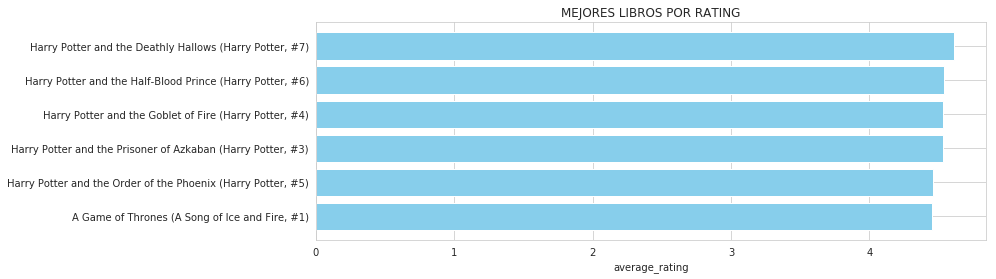

In [0]:
#Graphics of book
pop = books.sort_values('average_rating', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['average_rating'].head(6), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("average_rating")
plt.title("MEJORES LIBROS POR RATING")

Text(0.5, 1.0, 'MEJORES LIBROS RATING 1')

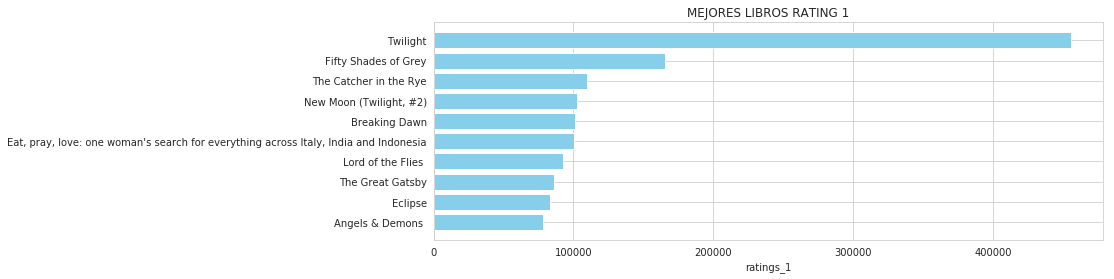

In [0]:
#Graphics of book
pop = books.sort_values('ratings_1', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(10),pop['ratings_1'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("ratings_1")
plt.title("MEJORES LIBROS RATING 1")

Text(0.5, 1.0, 'MEJORES LIBROS POR AUTOR')

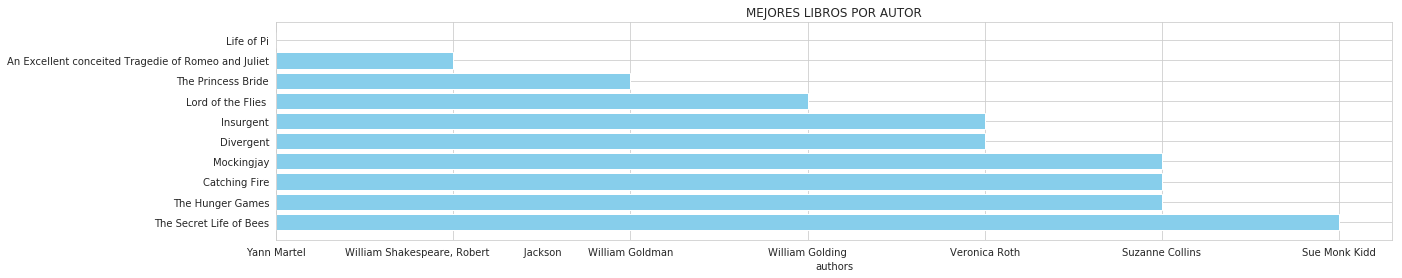

In [0]:
#Graphics of book
pop = books.sort_values('authors', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

plt.barh(pop['original_title'].head(10),pop['authors'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("authors")
plt.title("MEJORES LIBROS POR AUTOR")